<a href="https://colab.research.google.com/github/Akshita0501/CODSOFT/blob/main/Spam_SMS_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/My Drive/spam_detection.zip'

# Destination directory for extraction
extraction_dir = '/content/'

# Extract the dataset from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the files in the extraction directory to verify the file names
extracted_files = os.listdir(extraction_dir)
print("Extracted files:", extracted_files)



Extracted files: ['.config', 'spam.csv', 'drive', 'sample_data']


In [ ]:
selected_csv_file = 'spam.csv'
csv_file_path = os.path.join(extraction_dir, selected_csv_file)

if os.path.isfile(csv_file_path):
    # Specify the encoding as 'ISO-8859-1' (latin1)
    data = pd.read_csv(csv_file_path, encoding='ISO-8859-1')
    print("Data loaded successfully.")
else:
    print(f"File not found: {selected_csv_file}")


Data loaded successfully.


In [ ]:
# 1. Data Preprocessing
X = data['v2']  # Features (SMS messages)
y = data['v1']  # Target (0 for legitimate, 1 for spam)

In [ ]:
# 2. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [ ]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Training Multiple classifiers

In [ ]:
#1. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))


Naive Bayes Results:
Accuracy: 0.9721973094170404
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



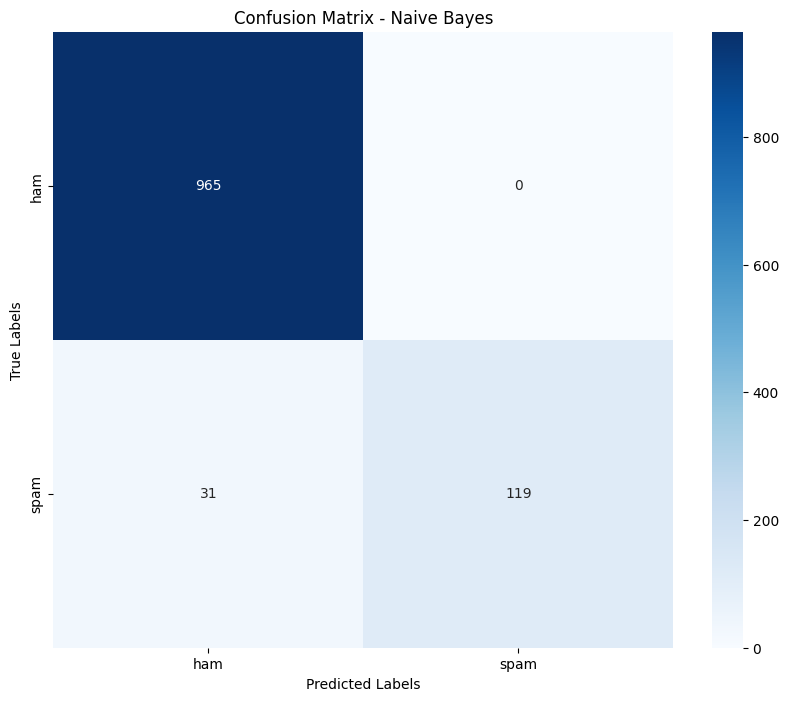

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix_nb = confusion_matrix(y_test, nb_pred)
classes = sorted(y_test.unique())

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [ ]:
#2. Linear SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("Linear SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Linear SVM Results:
Accuracy: 0.9766816143497757
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.87      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



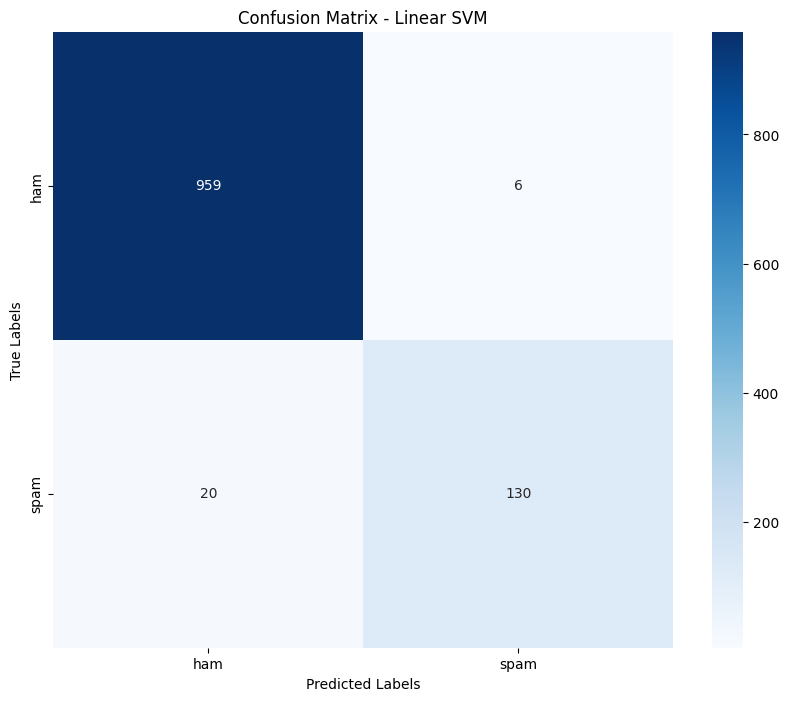

In [ ]:
# Create a confusion matrix
conf_matrix_nb = confusion_matrix(y_test, svm_pred)
classes = sorted(y_test.unique())

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Linear SVM')
plt.show()

In [ ]:
# 3.Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Results:
Accuracy: 0.957847533632287
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



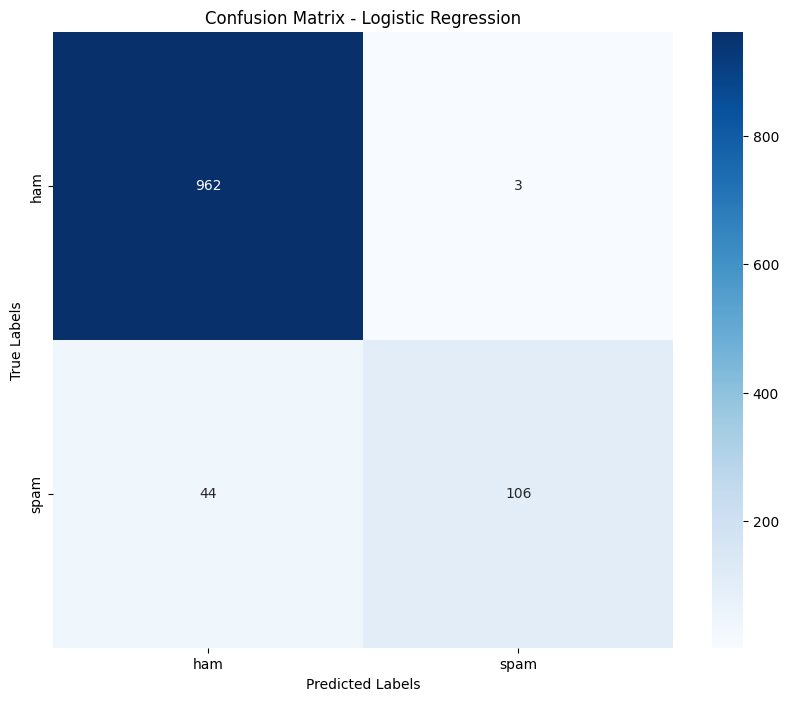

In [ ]:
# Create a confusion matrix
conf_matrix_nb = confusion_matrix(y_test, lr_pred)
classes = sorted(y_test.unique())

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
#4. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Results:
Accuracy: 0.979372197309417
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



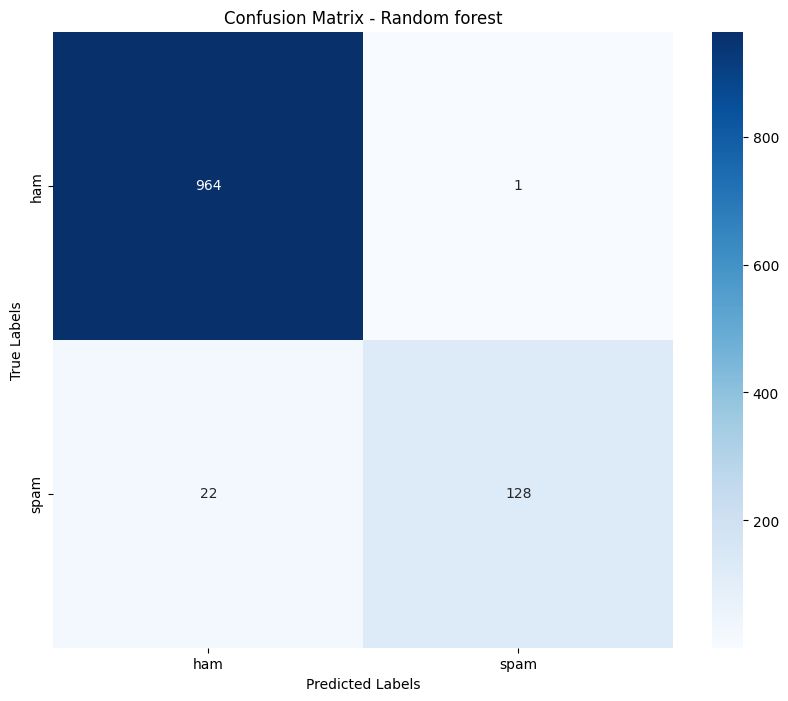

In [ ]:
# Create a confusion matrix
conf_matrix_nb = confusion_matrix(y_test, rf_pred)
classes = sorted(y_test.unique())

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random forest')
plt.show()

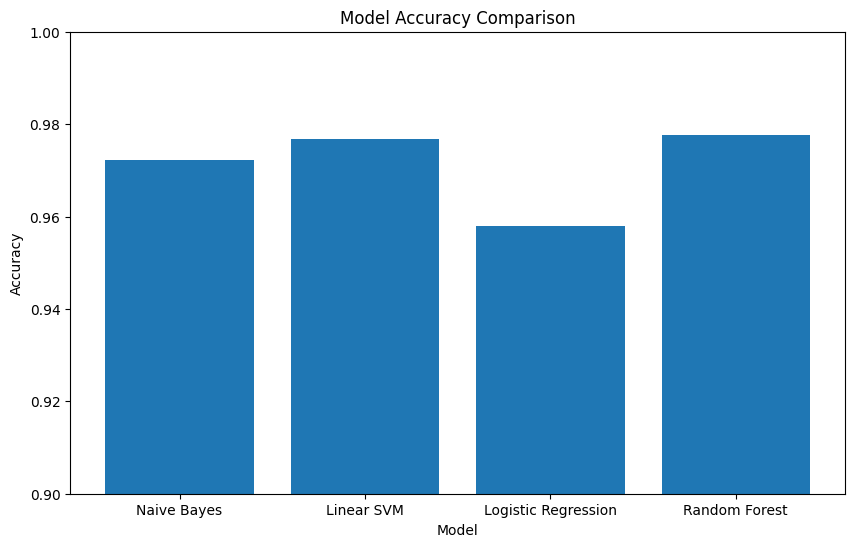

In [ ]:
# Initialize models
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Linear SVM', LinearSVC()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier())
]

accuracies = []

# Train and evaluate each model
for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))

# Plot the accuracy results
model_names, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values)
plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
def classify_message(message):
    # Transform the message using the same TF-IDF vectorizer
    message_tfidf = tfidf_vectorizer.transform([message])

    # Predict the label (0 for ham, 1 for spam)
    label = model.predict(message_tfidf)

    # Map the label to 'ham' or 'spam'
    if label == 0:
        return 'ham'
    else:
        return 'spam'

# Test a single message
message_to_classify = "Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!"
result = classify_message(message_to_classify)
print("Message classification:", result)

Message classification: spam


In [ ]:

def classify_message(message):
    # Transform the message using the same TF-IDF vectorizer
    message_tfidf = tfidf_vectorizer.transform([message])

    # Predict the label (0 for ham, 1 for spam)
    label = model.predict(message_tfidf)

    # Map the label to 'ham' or 'spam'
    if label == 0:
        return 'ham'
    else:
        return 'spam'

# Test a single message
message_to_classify = "Ok lar... Joking wif u oni..."
result = classify_message(message_to_classify)
print("Message classification:", result)

Message classification: spam
